In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report 
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, roc_curve, RocCurveDisplay, auc, r2_score, max_error
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score, homogeneity_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score
import pandas as pd
from operator import itemgetter

## Regressor

In [85]:
data = pd.read_csv('../data/energy_task_new2.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
y = data['Appliances']
X = data.drop(['Appliances'], axis=1)

In [87]:
data.shape

(19735, 31)

#### Набор данных содержит 31 признак. Будем пытаться понизить размерность

In [96]:
def test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
    bag = BaggingRegressor().fit(X_train, y_train)
    print("score: ", bag.score(X_test, y_test))

In [97]:
test(X, y)

score:  -4.04328495582196


In [92]:
X.describe()

,day,mth,year,hour,min,lights,T1,RH_1,T2,RH_2,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.0,19735.0,19735.0,19735.0,19735.0,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.0,1.0,2.0,0.0,1.0,3.801875,21.686571,40.259739,20.341219,40.416943,...,22.030801,42.936165,19.486594,41.553061,7.414858,755.521144,79.748120,4.039752,38.331128,3.760995
std,0.0,0.0,0.0,0.0,0.0,7.935988,1.606066,3.979299,2.192974,4.058085,...,1.949773,5.224361,2.010962,4.151105,5.290425,7.381712,14.862386,2.451221,11.789945,4.195248
min,0.0,1.0,2.0,0.0,1.0,0.000000,16.790000,27.023333,16.100000,20.463333,...,16.362222,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,0.0,1.0,2.0,0.0,1.0,0.000000,20.760000,37.333333,18.790000,37.900000,...,20.790000,39.066667,18.033333,38.500000,3.700000,750.950000,70.333333,2.000000,29.000000,0.900000
50%,0.0,1.0,2.0,0.0,1.0,0.000000,21.600000,39.656667,20.000000,40.460000,...,22.100000,42.375000,19.390000,40.900000,7.000000,756.050000,83.666667,3.666667,40.000000,3.430000
75%,0.0,1.0,2.0,0.0,1.0,0.000000,22.600000,43.066667,21.500000,43.230000,...,23.390000,46.536000,20.600000,44.338095,10.400000,760.900000,91.666667,5.500000,40.000000,6.570000
max,0.0,1.0,2.0,0.0,1.0,70.000000,26.260000,63.360000,29.856667,56.026667,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


## 1. Отбор признаков

## 1.1 Отбираем признаки с высокой дисперсией

In [106]:
# параметр - порог значения дисперсии
# будут отобраны только те признаки, у которых дисперсия выше
vt = VarianceThreshold(6)
X_vt = vt.fit_transform(X)
X_vt.shape

(19735, 17)

In [107]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,lights,RH_1,RH_2,RH_3,RH_4,RH_5,T6,RH_6,RH_7,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,30.0,47.596667,44.790000,44.730000,45.566667,55.20,7.026667,84.256667,41.626667,48.900000,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,30.0,46.693333,44.722500,44.790000,45.992500,55.20,6.833333,84.063333,41.560000,48.863333,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,30.0,46.300000,44.626667,44.933333,45.890000,55.09,6.560000,83.156667,41.433333,48.730000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,40.0,46.066667,44.590000,45.000000,45.723333,55.09,6.433333,83.423333,41.290000,48.590000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,40.0,46.333333,44.530000,45.000000,45.530000,55.09,6.366667,84.893333,41.230000,48.590000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9


In [108]:
test(X_vt, y)

score:  -2.4277883244072433


#### произведем масштабирование данных

In [109]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,day,mth,year,hour,min,lights,T1,RH_1,T2,RH_2,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,0.0,0.0,0.0,0.0,0.0,3.301264,-1.118645,1.843821,-0.520411,1.077643,...,-1.964792,1.141572,-1.219975,0.958068,-0.154029,-2.983278,0.824376,1.207694,2.092418,0.366854
1,0.0,0.0,0.0,0.0,0.0,3.301264,-1.118645,1.616807,-0.520411,1.061009,...,-1.964792,1.134554,-1.203398,0.965295,-0.176712,-2.969731,0.824376,1.071703,1.767274,0.343017
2,0.0,0.0,0.0,0.0,0.0,3.301264,-1.118645,1.517959,-0.520411,1.037393,...,-1.964792,1.109032,-1.236551,0.950841,-0.197505,-2.956184,0.824376,0.935713,1.442130,0.319180
3,0.0,0.0,0.0,0.0,0.0,4.561378,-1.118645,1.459321,-0.520411,1.028358,...,-2.016081,1.082233,-1.236551,0.926750,-0.220188,-2.942636,0.824376,0.799723,1.116986,0.295343
4,0.0,0.0,0.0,0.0,0.0,4.561378,-1.118645,1.526336,-0.520411,1.013572,...,-2.016081,1.082233,-1.236551,0.926750,-0.242871,-2.929089,0.824376,0.663733,0.791842,0.271506


In [115]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
test(X_vt, y)

(19735, 4)
score:  -3.2496845908026986


## 1.2 Одномерный отбор признаков

#### Одномерный отбор признаков предполагает, что для каждого признака оценивается степень его влияния на целевую переменную.

In [118]:
skb = SelectKBest(k=6)
X_skb = skb.fit_transform(X, y)
test(X_skb, y)

C:\ML\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0 1 2 3 4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ML\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


score:  -2.409959236517319


In [119]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,lights,T1,T2,T3,T4,T8
0,30.0,19.890000,19.200000,19.790000,19.000000,18.2000
1,30.0,19.890000,19.200000,19.790000,19.000000,18.2000
2,30.0,19.890000,19.200000,19.790000,18.926667,18.2000
3,40.0,19.890000,19.200000,19.790000,18.890000,18.1000
4,40.0,19.890000,19.200000,19.790000,18.890000,18.1000
...,...,...,...,...,...,...
19730,0.0,25.566667,25.890000,27.200000,24.700000,24.7000
19731,0.0,25.500000,25.754000,27.133333,24.700000,24.7000
19732,10.0,25.500000,25.628571,27.050000,24.700000,24.7000
19733,10.0,25.500000,25.414000,26.890000,24.700000,24.6625


## 1.3 Рекурсивный отбор признаков

#### Рекурсивный отбор признаков предполагает обучение множества моделей. Сначала модель обучается на всех признаках, а затем мы начинаем исключать из модели признаки с низкой значимостью

In [120]:
tree = DecisionTreeRegressor().fit(X, y)

In [121]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,RH_5,RH_7,Press_mm_hg,Tdewpoint
0,55.200000,41.626667,733.5,5.3
1,55.200000,41.560000,733.6,5.2
2,55.090000,41.433333,733.7,5.1
3,55.090000,41.290000,733.8,5.0
4,55.090000,41.230000,733.9,4.9
...,...,...,...,...
19730,52.400000,44.500000,755.2,13.3
19731,52.326667,44.414286,755.2,13.3
19732,52.266667,44.400000,755.2,13.3
19733,52.200000,44.295714,755.2,13.2


In [122]:
test(X_rfe, y)

score:  -1.6293600231379286


## 1.4 Отбор признаков по их значимости

#### Во многих случаях можно не использовать рекурсивный отбор, а просто взять обученное дерево и сразу же взять нужное количество признаков с самой высокой значимостью

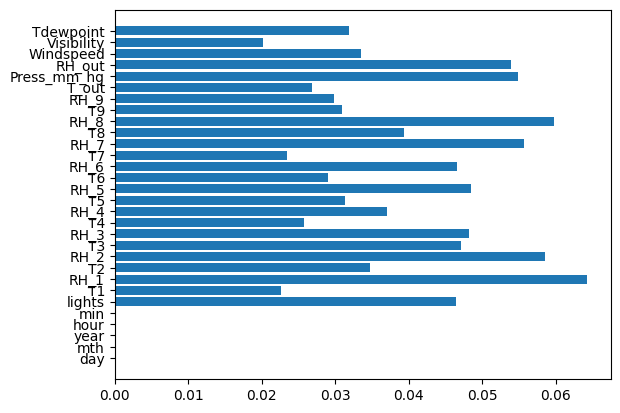

In [123]:
plt.barh(width=tree.feature_importances_, y=X.columns);

## 2. Выделение признаков

## 2.1 Метод главных компонент

In [134]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(19735, 2)

#### Данные имеют размерность 2 - их можно визуализировать

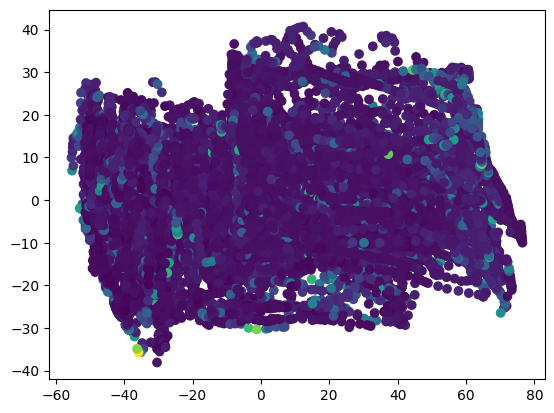

In [135]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

#### Мы понизили размерность до 2 признаков, и теперь имеет смысл оценить, сколько информации мы потеряли

In [136]:
sum(pca.explained_variance_ratio_)

0.7438832788871904

#### Видно, что мы сохранили более 74% информации понизив размерность до 2 - попробуем выполнить регрессию

In [137]:
test(X_pca, y)

score:  -1.0706986588405858


In [138]:
pca_2 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X, y)

In [139]:
sum(pca.explained_variance_ratio_)

0.7438832788871904

In [140]:
test(X_pca_2, y)

score:  -0.7703794978643494


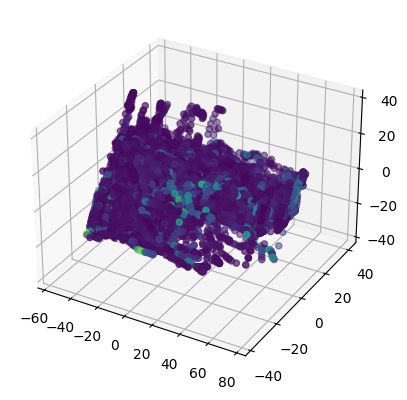

In [141]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2[:,0], X_pca_2[:,1], X_pca_2[:,2], c=y);

## 2.2 Нелинейные методы выделения признаков

#### Нелинейные методы понижения размерности предполагают, что данные должны быть расположены на нелинейной поверхности меньшей размерности, чем исходное пространство

In [142]:
from sklearn.manifold import TSNE, Isomap
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

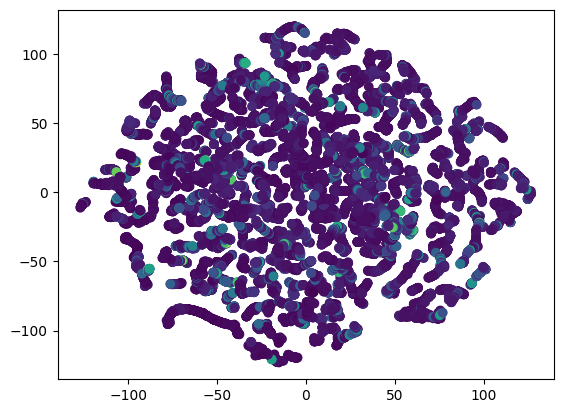

In [143]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y);

In [144]:
test(X_tsne, y)

score:  -6.133034578987121


In [145]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

C:\ML\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 39 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: 

C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensi

C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensi

C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensi

C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensi

C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensi

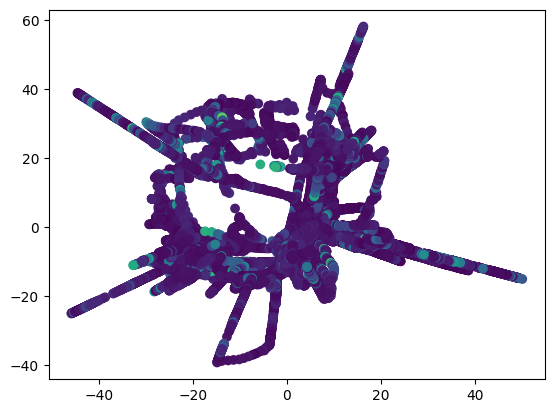

In [146]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y);

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


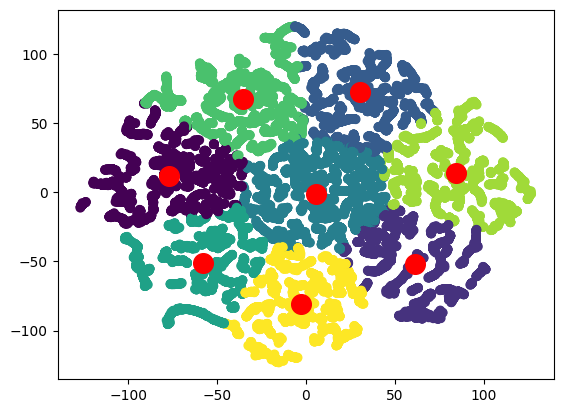

In [148]:
kmeans = KMeans(n_clusters=8).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [149]:
silhouette_score(X_tsne, kmeans.labels_)

0.3541929

## Classification

In [2]:
data2 = pd.read_csv('../data/neo_task_new2.csv')
data2.drop(['Unnamed: 0'], axis=1, inplace=True)
data2.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,0.016016,0.035813,56014.078517,1.024333e+06,26.1,0
1,54016766.0,0.030518,0.068240,7864.348060,3.268186e+07,24.7,0
2,3746620.0,0.055533,0.124177,55257.544508,6.538636e+07,23.4,0
3,3633054.0,0.019256,0.043057,41531.404722,1.260796e+07,25.7,0
4,3742124.0,0.139494,0.311918,67639.394481,7.130590e+07,21.4,0


In [3]:
data2.shape

(90836, 7)

In [4]:
data2 = data2.sort_values(by='hazardous', ascending=False)
data2 = data2[:(data2[data2['hazardous'] == 1].shape[0]*2)]
data2.shape

(17680, 7)

In [5]:
data2[data2['hazardous'] == 0].shape, data2[data2['hazardous'] == 1].shape

((8840, 7), (8840, 7))

In [6]:
data2 = data2.sample(frac=1)

#### Набор данных содержит 7 признаков. Будем пытаться понизить размерность

In [7]:
X = data2.drop(['hazardous'], axis=1)
y = data2['hazardous']

#### Тестировать модель будем с помощью ансамбля

In [8]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [9]:
test(X, y)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1317
           1       0.85      0.92      0.88      1335

    accuracy                           0.88      2652
   macro avg       0.88      0.88      0.88      2652
weighted avg       0.88      0.88      0.88      2652



In [10]:
X.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,1.768000e+04,17680.000000,17680.000000,17680.000000,1.768000e+04,17680.000000
mean,1.070034e+07,0.201810,0.450315,54455.689032,3.826384e+07,22.086499
std,1.798537e+07,0.276804,0.617150,27010.188972,2.175260e+07,2.810398
min,2.001566e+06,0.001011,0.002260,781.214577,1.865141e+04,14.040000
25%,2.518640e+06,0.040230,0.089958,33873.181657,1.951163e+07,20.200000
50%,3.617118e+06,0.135381,0.297879,50377.703848,3.905999e+07,21.500000
75%,3.825136e+06,0.242412,0.542051,70030.673585,5.712745e+07,24.000000
max,5.427479e+07,4.135757,9.247833,194056.414989,7.479095e+07,32.100000


## 1. Отбор признаков

## 1.1 Отбираем признаки с высокой дисперсией

In [11]:
# параметр - порог значения дисперсии
# будут отобраны только те признаки, у которых дисперсия выше
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X)
X_vt.shape

(17680, 4)

In [12]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,id,relative_velocity,miss_distance,absolute_magnitude
0,2286080.0,83510.965654,4.242475e+07,21.14
1,3837746.0,65497.376691,5.149606e+07,23.70
2,2162510.0,84554.801228,2.790427e+07,17.51
3,3648469.0,40322.621666,4.502081e+07,24.70
4,3758926.0,73522.868503,6.035586e+07,21.90


In [13]:
test(X_vt, y)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1317
           1       0.85      0.93      0.89      1335

    accuracy                           0.88      2652
   macro avg       0.88      0.88      0.88      2652
weighted avg       0.88      0.88      0.88      2652



#### произведем масштабирование данных

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,-0.467852,-0.161032,-0.159969,1.075746,0.191289,-0.336794
1,-0.381576,-0.554352,-0.554438,0.408809,0.608322,0.574135
2,-0.474723,2.293605,2.301841,1.114393,-0.476259,-1.628463
3,-0.392100,-0.618839,-0.619113,-0.523264,0.310637,0.929966
4,-0.385959,-0.328785,-0.328211,0.705945,1.015632,-0.066362


In [25]:
vt = VarianceThreshold(0.9999)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
test(X_vt, y)

(17680, 6)
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1317
           1       0.85      0.93      0.89      1335

    accuracy                           0.88      2652
   macro avg       0.89      0.88      0.88      2652
weighted avg       0.89      0.88      0.88      2652



## 1.2 Одномерный отбор признаков

#### Одномерный отбор признаков предполагает, что для каждого признака оценивается степень его влияния на целевую переменную.

In [37]:
skb = SelectKBest(k=2)
X_skb = skb.fit_transform(X, y)
test(X_skb, y)
X_skb.shape

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1317
           1       0.82      0.97      0.89      1335

    accuracy                           0.88      2652
   macro avg       0.89      0.88      0.87      2652
weighted avg       0.89      0.88      0.87      2652



(17680, 2)

In [38]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,est_diameter_min,absolute_magnitude
0,0.157237,21.14
1,0.048368,23.70
2,0.836672,17.51
3,0.030518,24.70
4,0.110804,21.90
...,...,...
17675,0.146068,21.30
17676,0.110804,21.90
17677,0.010105,27.10
17678,1.522492,16.21


## 1.3 Рекурсивный отбор признаков

#### Рекурсивный отбор признаков предполагает обучение множества моделей. Сначала модель обучается на всех признаках, а затем мы начинаем исключать из модели признаки с низкой значимостью

In [39]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [40]:
tree = DecisionTreeClassifier().fit(X, y)

In [41]:
rfe = RFE(estimator=tree, n_features_to_select=2, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,id,est_diameter_min
0,2286080.0,0.157237
1,3837746.0,0.048368
2,2162510.0,0.836672
3,3648469.0,0.030518
4,3758926.0,0.110804
...,...,...
17675,3475238.0,0.146068
17676,3674578.0,0.110804
17677,3781461.0,0.010105
17678,2164121.0,1.522492


In [42]:
test(X_rfe, y)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1317
           1       0.91      0.97      0.93      1335

    accuracy                           0.93      2652
   macro avg       0.93      0.93      0.93      2652
weighted avg       0.93      0.93      0.93      2652



## 1.4 Отбор признаков по их значимости

#### Во многих случаях можно не использовать рекурсивный отбор, а просто взять обученное дерево и сразу же взять нужное количество признаков с самой высокой значимостью

In [43]:
import matplotlib.pyplot as plt

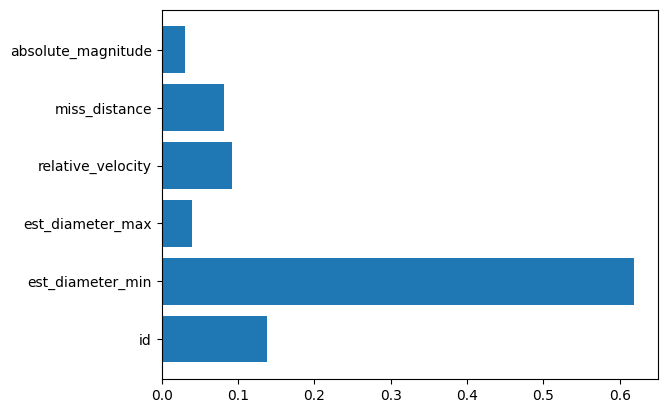

In [44]:
plt.barh(width=tree.feature_importances_, y=X.columns);

## 2. Выделение признаков

## 2.1 Метод главных компонент

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(17680, 2)

#### Данные имеют размерность 2 - их можно визуализировать

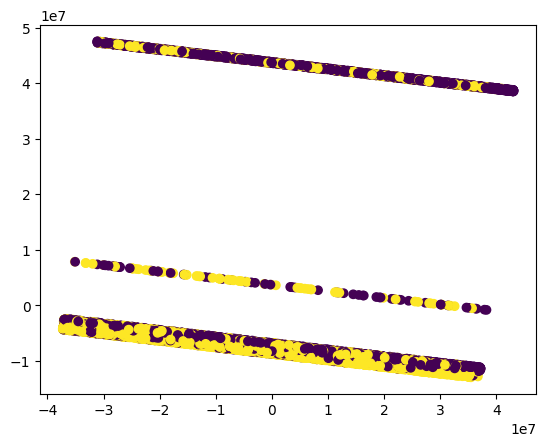

In [47]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

#### Мы понизили размерность до 2 признаков, и теперь имеет смысл оценить, сколько информации мы потеряли

In [48]:
sum(pca.explained_variance_ratio_)

0.999999162660642

#### Видно, что мы сохранили более 99% информации понизив размерность до 2 - попробуем выполнить классификацию

In [54]:
test(X_pca, y)

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1317
           1       0.71      0.65      0.68      1335

    accuracy                           0.69      2652
   macro avg       0.69      0.69      0.69      2652
weighted avg       0.69      0.69      0.69      2652



#### Качестве классификации понизилось, но при этом мы получили данные с размерностью 2

In [55]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(17680, 3)

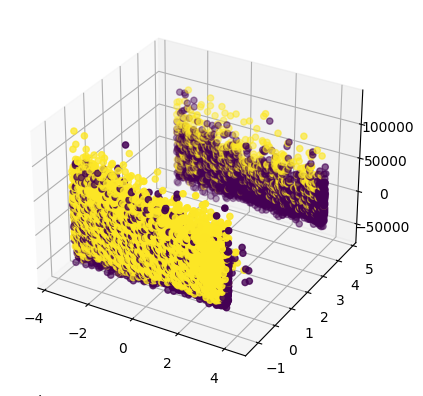

In [56]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y);

In [57]:
sum(pca.explained_variance_ratio_)

0.9999999999999915

In [58]:
test(X_pca, y)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1317
           1       0.72      0.68      0.70      1335

    accuracy                           0.71      2652
   macro avg       0.71      0.71      0.71      2652
weighted avg       0.71      0.71      0.71      2652



## 2.2 Нелинейные методы выделения признаков

#### Нелинейные методы понижения размерности предполагают, что данные должны быть расположены на нелинейной поверхности меньшей размерности, чем исходное пространство

In [59]:
from sklearn.manifold import TSNE, Isomap

In [61]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

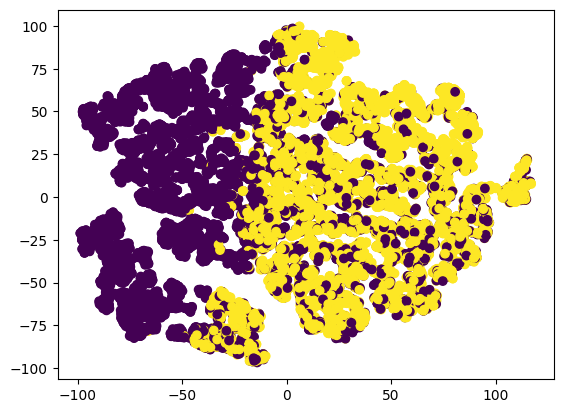

In [62]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y);

In [63]:
test(X_tsne, y)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1317
           1       0.82      0.85      0.84      1335

    accuracy                           0.83      2652
   macro avg       0.83      0.83      0.83      2652
weighted avg       0.83      0.83      0.83      2652



In [64]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

C:\ML\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\ML\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


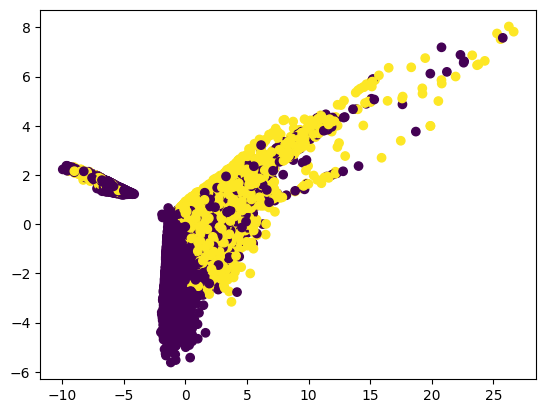

In [65]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y);

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\ML\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


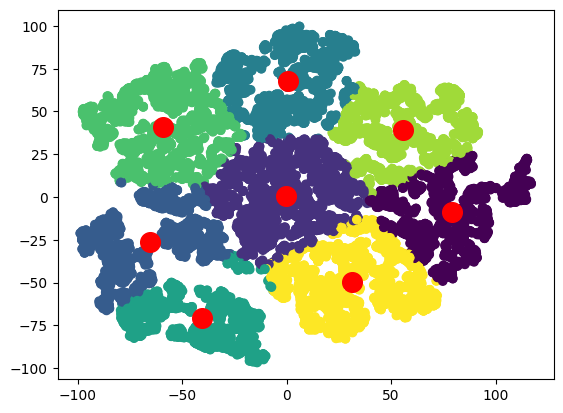

In [79]:
kmeans = KMeans(n_clusters=8).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [80]:
silhouette_score(X_tsne, kmeans.labels_)

0.37825742

## Самостоятельно реализуйте алгоритм PCA

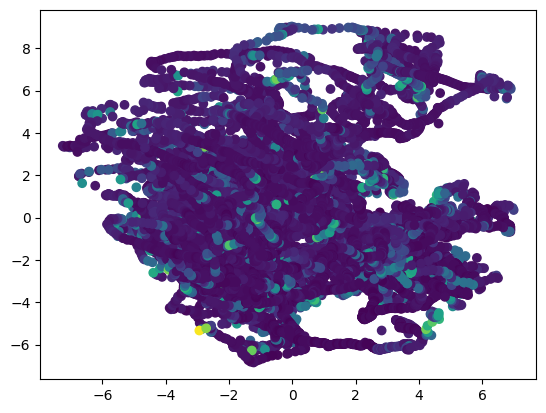

In [151]:
def pca(X, num_components):
    scaler = StandardScaler() #Стандартизация данных
    X_scaled = scaler.fit_transform(X)
    
    cov_matrix = np.cov(X_scaled, rowvar=False) #Вычисление ковариационной матрицы
    
    #Вычисление собственных векторов и собственных значений ковариационной матрицы.
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
    
    #Сортировка пар <собственное значение, собственный вектор> по убыванию.
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    
    # Выбор нужного числа главных компонент
    eigenvector_subset = sorted_eigenvectors[:, 0:num_components]
    
    # Проецирование данных на главные компоненты
    X_reduced = np.dot(eigenvector_subset.transpose(), X_scaled.transpose()).transpose()
    return X_reduced

pca3 = pca(X, 2)
plt.scatter(pca3[:,1], pca3[:,0], c=y);

In [153]:
test(pca3, y)

score:  -2.748656169729896


## Попробуйте выполнить кластеризацию преобразованных выше данных с помощью вашей реализации алгоритма KMeans.

In [160]:
def KMeanss(data, k=4, num_iter=10, min_distance=0.005, seed=0):
  np.random.seed(seed)
  centroid_ids = np.random.choice(data.shape[0], k, replace=False)
  centroids = data[centroid_ids]

  for i in range(num_iter):
    clusters = {x: [] for x in range(k)}
    res = []
    for x in data:
      distances = np.linalg.norm(centroids - x, axis=1)
      cluster_ind = distances.argmin()
      clusters[cluster_ind].append(x)   
      res.append(cluster_ind)
    new_centroids = {}
    count = []
    for cluster in clusters:
      new_centroids[cluster] = np.mean(clusters[cluster], axis=0)
      count.append(len(clusters[cluster]))
    new_centroids = np.array(list(new_centroids.values()))
    is_stop = True
    for cluster in range(len(centroids)):
      if np.linalg.norm(centroids[cluster] - new_centroids[cluster]) > min_distance:
        is_stop = False
        break
    if is_stop:
      print(f'stopping at iter {i}')
      break
    centroids = new_centroids

  return centroids, clusters, res

In [171]:
data = pca3
data_y = y
centroids, clusters, res = KMeanss(data)
pd.DataFrame(sorted(centroids, key=itemgetter(0)), columns=['x','y']).T

print( "silhouette score: ", silhouette_score(data, res))

silhouette score:  0.3687692040998363


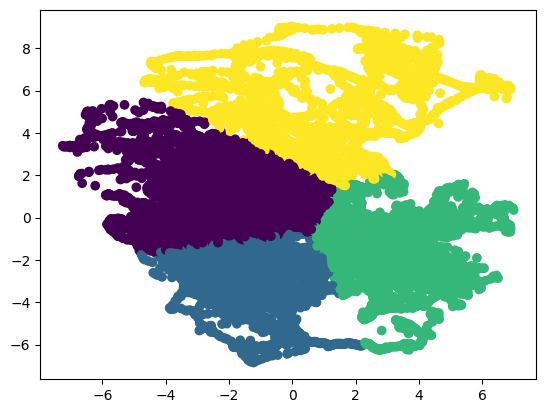

In [172]:
plt.scatter(pca3[:,1], pca3[:,0], c=res)

## RegCoef

In [175]:
class LR:
    
    def __init__(self, lr = 0.0001, i = 5000): 
        self.lr = lr 
        self.i = i
        
    def transform(self, x):
        return np.concatenate((np.ones((len(x), 1)), x), axis = 1)
        
    def Loss(self, x, y, w):
        return sum((y-np.dot(x, w))**2)/x.shape[0]
        
    def fit(self, x, y):
        dist = np.inf
        eps = 1e-4
        X = self.transform(x)
        w = np.zeros((X.shape[1]))
        k = 0
        while dist > eps and k <= self.i:
            L = self.Loss(X,y,w)
            w = w - self.lr*2*np.dot(X.T,y -(np.dot(X, w))/X.shape[0])
            dist = np.abs(L - self.Loss(X,y,w))
            k += 1
        self.w = w
        
    def coef(self):
        return self.w
    
    def predict(self, x):
        x = self.transform(x)
        return (np.dot(x, self.w))    

In [183]:
lr = LR()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(y_pred)
print(lr.coef())

[-1.46300306e+156 -1.46281942e+156 -1.46266562e+156 ... -1.46896532e+156
 -1.46906863e+156 -1.46914917e+156]
[-2.46442040e+150  0.00000000e+000 -2.46442040e+150 -4.92884080e+150
  0.00000000e+000 -2.46442040e+150 -1.01744564e+151 -5.23261740e+151
 -9.81348803e+151 -4.87064712e+151 -9.91709985e+151 -5.34363256e+151
 -9.64889654e+151 -4.99266807e+151 -9.53819479e+151 -4.69134953e+151
 -1.25936441e+152 -1.59226625e+151 -1.48638200e+152 -4.84083369e+151
 -8.59466826e+151 -5.31426213e+151 -1.05162446e+152 -4.64621159e+151
 -1.01682506e+152 -1.51847069e+151 -1.86269694e+153 -1.99194694e+152
 -1.03475500e+151 -9.53016639e+151 -6.84410462e+150]


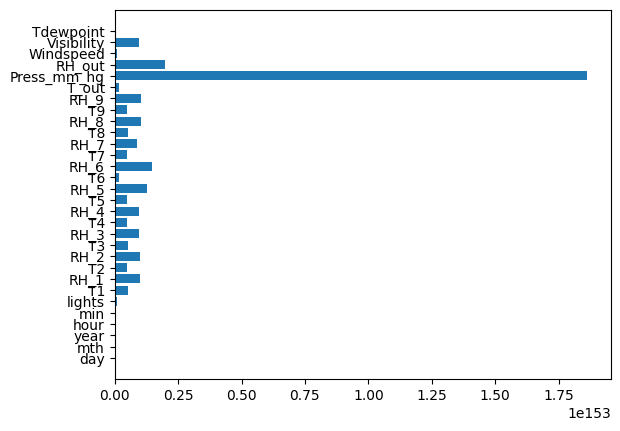

In [190]:
plt.barh(width=abs(lr.coef()[1:]), y=X.columns);